In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Equal Width Disretization

In [2]:
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
df=pd.read_csv("titanic.csv",usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.dropna(inplace=True)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(df[["Age","Fare"]],df["Survived"],test_size=0.2,random_state=1)

In [6]:
#uniform indicates equal width
#after discretizing it becomes discrete/categorical so we need to encode, here i am doing with ordinal encoding
#number of bins is 8 and they are of equal width 
disc=KBinsDiscretizer(n_bins=8,strategy="uniform",encode="ordinal")

In [7]:
x_train_disc=pd.DataFrame(disc.fit_transform(x_train),columns=x_train.columns)
x_test_disc=pd.DataFrame(disc.transform(x_test),columns=x_test.columns)

In [8]:
x_train_disc

,Age,Fare
0,1.0,0.0
1,2.0,0.0
2,3.0,0.0
3,2.0,0.0
4,2.0,0.0
...,...,...
566,3.0,0.0
567,3.0,0.0
568,2.0,0.0
569,1.0,1.0


In [9]:
x_train_disc["Age"].nunique()

8

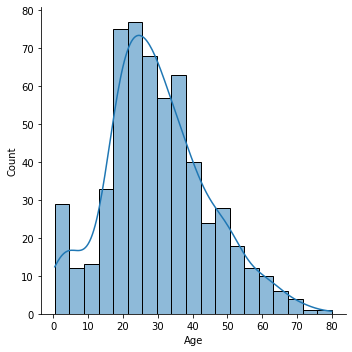

In [10]:
sns.displot(data=x_train,x="Age",kde=True)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

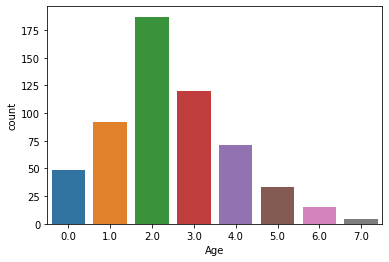

In [11]:
sns.countplot(data=x_train_disc,x="Age")

## Equal Frequency Discretizer

In [12]:
x_train,x_test,y_train,y_test=train_test_split(df[["Age","Fare"]],df["Survived"],test_size=0.2,random_state=1)

In [13]:
disc=KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="quantile")

In [14]:
x_train_disc=pd.DataFrame(disc.fit_transform(x_train),columns=x_train.columns)
x_test_disc=pd.DataFrame(disc.transform(x_test),columns=x_test.columns)

In [15]:
x_train_disc

,Age,Fare
0,1.0,4.0
1,3.0,5.0
2,7.0,6.0
3,5.0,2.0
4,3.0,1.0
...,...,...
566,7.0,0.0
567,7.0,4.0
568,4.0,5.0
569,2.0,9.0


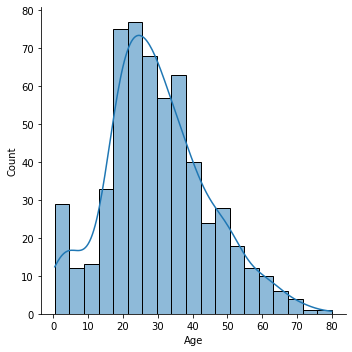

In [16]:
sns.displot(data=x_train,x="Age",kde=True)

<AxesSubplot:xlabel='Age', ylabel='count'>

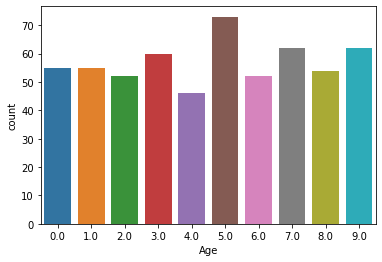

In [17]:
sns.countplot(data=x_train_disc,x="Age")

In [18]:
x_train_disc["Age"].value_counts()

5.0    73
7.0    62
9.0    62
3.0    60
1.0    55
0.0    55
8.0    54
6.0    52
2.0    52
4.0    46
Name: Age, dtype: int64

## Kmeans Discretization

In [33]:
disc=KBinsDiscretizer(n_bins=4,encode="ordinal",strategy="kmeans")

In [39]:
#for discretizing using kmeans algorithm just use this
#this will make the variable into 4 clusters 

## Arbitary discretization:based on domain knowledge or our needs

In [43]:
df=pd.read_csv("titanic.csv",usecols=['Age','Survived'])
df.dropna(inplace=True)
df.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


<AxesSubplot:>

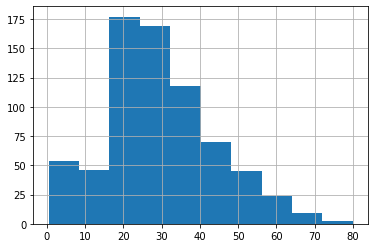

In [52]:
df["Age"].hist()

In [53]:
df["Age_disc"]=pd.cut(df["Age"],bins=[0,18,60,100],labels=["kids","adults","old"])

In [56]:
df.sample(10)

,Survived,Age,Age_disc
877,0,19.0,adults
96,0,71.0,old
440,1,45.0,adults
385,0,18.0,kids
452,0,30.0,adults
515,0,47.0,adults
544,0,50.0,adults
239,0,33.0,adults
751,1,6.0,kids
356,1,22.0,adults


<AxesSubplot:xlabel='Age_disc', ylabel='count'>

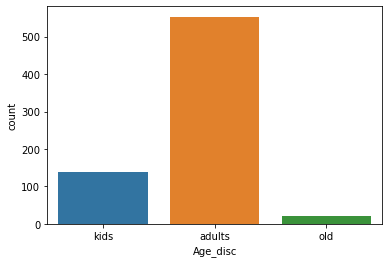

In [57]:
sns.countplot(data=df,x="Age_disc")

## Binarization

In [17]:
from sklearn.preprocessing import Binarizer

In [18]:
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
x_train,x_test,y_train,y_test=train_test_split(df[["Age","Fare"]],df["Survived"],test_size=0.2,random_state=1)

In [20]:
x_train.head()

,Age,Fare
830,15.0,14.4542
565,24.0,24.1500
148,36.5,26.0000
105,28.0,7.8958
289,22.0,7.7500


In [21]:
x_train.reset_index(inplace=True)
x_test.reset_index(inplace=True)

In [22]:
bi=Binarizer(threshold=18)

In [23]:
x_train["age_bi"]=pd.DataFrame(bi.fit_transform(x_train[["Age"]]))
x_test["age_bi"]=pd.DataFrame(bi.transform(x_test[["Age"]]))

In [26]:
x_train.drop("index",axis=1,inplace=True)
x_train.head()

,Age,Fare,age_bi
0,15.0,14.4542,0.0
1,24.0,24.1500,1.0
2,36.5,26.0000,1.0
3,28.0,7.8958,1.0
4,22.0,7.7500,1.0
